# **Semestrální práce č. 2**
## Operační analýza
### Jan Burian



## **1.   Zadání**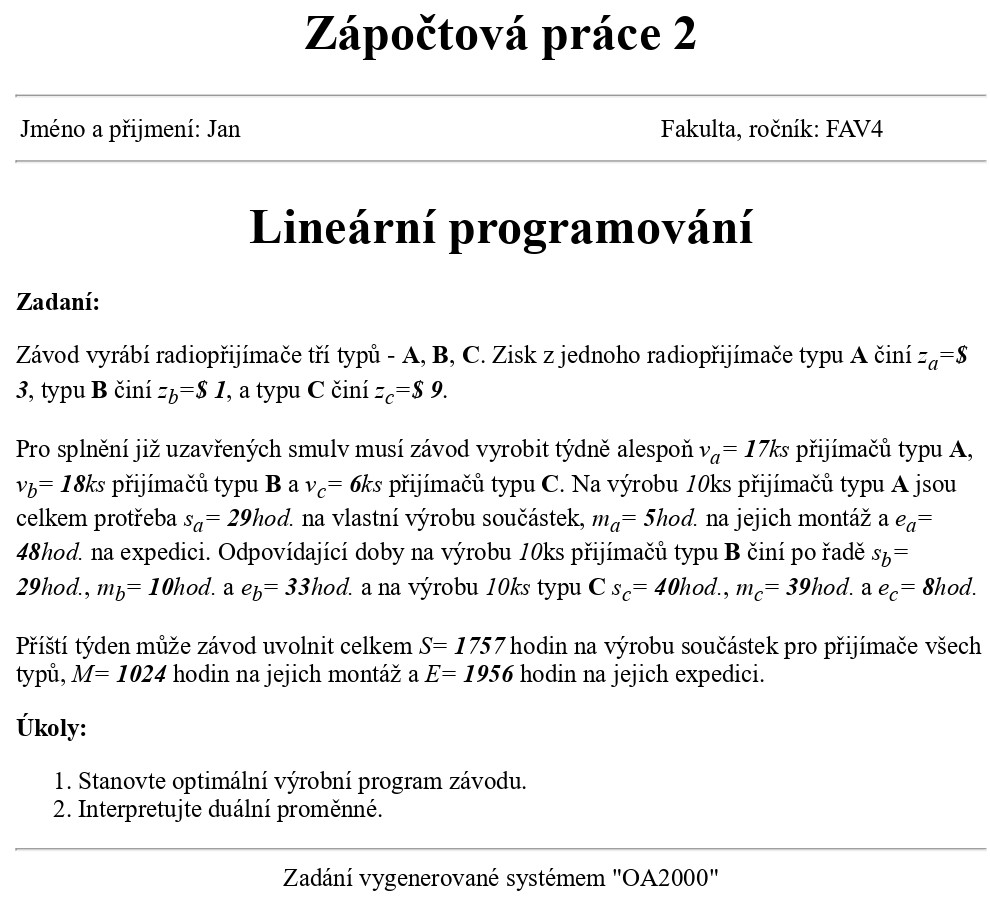




## **2.   Vypracování**



### **2.1   Proměnné**
Nejprve je třeba zavést proměnné $x$. Pomocí proměnných $x$ bude označen počet radiopřijímačů A, B a C, které se mají vyrobit:
* $x_1$ -- počet radiopřijímačů A
* $x_2$ -- počet radiopřijímačů B
* $x_3$ -- počet radiopřijímačů C

Ze zadání vyplývá, že hodnoty proměnných se pohybují v následujících intervalech:
* $x_1$ = $<17, \infty)$
* $x_2$ = $<18, \infty)$
* $x_3$ = $<6, \infty)$



### **2.2   Omezující podmínky**
Nejprve je třeba definovat omezující podmínky týkající se doby vlastní výroby součástek jednotlivých radiopřijímačů, doby montáže a doby expedice. Jednotlivé doby v zadání jsou uvedeny pro 10 ks radiopřijímačů. 

Obecné tvary omezujících podmínek jsou následující: 

$s_ax_1 + s_bx_2 + s_cx_3 \leq S$

$m_ax_1 + m_bx_2 + m_cx_3 \leq M$

$e_ax_1 + e_bx_2 + e_cx_3 \leq E$

Po dosazení dostaneme:  

$29x_1 + 29x_2 + 40x_3 \leq 1757$

$5x_1 + 10x_2 + 39x_3 \leq 1024$

$48x_1 + 33x_2 + 8x_3 \leq 1956$

Omezující podmínky pro 1 ks radiopřijímače A, B, C jsou tedy následující:

$2.9x_1 + 2.9x_2 + 4.0x_3 \leq 1757$

$0.5x_1 + 1.0x_2 + 3.9x_3 \leq 1024$

$4.8x_1 + 3.3x_2 + 0.8x_3 \leq 1956$

Přidáme omezující podmínky pro proměnné $x$: 
* $x_1$ = $<17, \infty)$
* $x_2$ = $<18, \infty)$
* $x_3$ = $<6, \infty)$



### **2.3   Cílová funkce**
Zisk z jednoho radiopřijímače typu A činí $z_a$=\$3, typu B činí $z_b$=\$1, a typu C činí $z_c$=\$9.

Pomocí jednotlivých zisků definujeme cílovou funkci. Obecný zápis cílové funkce je následující: 
$$ z = z_ax_1 + z_bx_2 + z_cx_3 \longrightarrow \max $$

Po dosazení:

$$ z = 3x_1 + 1x_2 + 9x_3 \longrightarrow \max $$

### **2.4   Definice modelu pomocí matic**
Úlohu je možné obecně zapsat ve tvaru:
$$ z = cx $$

$$ Ax \leq b. $$

V tomto příkladu:

$$ c = [c_i] =
    \begin{bmatrix}
        3 & 1 & 9
    \end{bmatrix} $$

$$ A = [ a_{ij} ] = 
    \begin{bmatrix}
    2.9 & 2.9 & 4.0 \\\\
    0.5 & 1.0 & 3.9 \\\\
    4.8 & 3.3 & 0.8 \\
    \end{bmatrix} $$

$$ b = [b_j] =
  \begin{bmatrix}
    1757  \\
    1024 \\
    1956 \\
  \end{bmatrix} $$



### **2.5   Příprava nástroje**



Instalace knihovny OR-Tools od Googlu

In [1]:
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.0 MB 1.6 MB/s 
     |████████████████████████████████| 408 kB 49.2 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220929150707 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.7 which is incompatible.
tensorflow-metadata 1.10.0 requires protobuf<4,>=3.13, but you have protobuf 4.21.7 which is incompatible.
google-cloud-bigquery-storage 1.1.2 requires protobuf<4.0.0dev, but you have protobuf 4.21.7 which is incompatible.
google-api-core 1.31.6 requires protobuf<4.0.0dev,>=3.12.0; python_version > "3", but you have proto

Import potřebného "solveru" pro lineární programování (`linear_solver`)

In [2]:
from ortools.linear_solver import pywraplp

Solver je nyní nutné inicializovat. Pro potřeby této semestrální práce bude použit Google's linear programming system (GLOP). 

In [3]:
solver = pywraplp.Solver.CreateSolver('GLOP')

### **2.6   Řešení úlohy**


#### 2.6.1 Potřebné metody####

In [4]:
# Definice proměnných
def define_variables(solver, c, lower_limits):
    x = {}
    n_vars = len(c)
    for j in range(n_vars):
        x[j] = solver.NumVar(lower_limits[j], solver.infinity(), 'x{}'.format(j+1))
    return x, n_vars

# Definice omezujících podmínek
def set_constraints(solver, x, A, b):
    n_vars = len(x)
    n_constraints = len(b)
    for i in range(n_constraints):
        constraint = solver.RowConstraint(-solver.infinity(), b[i], '')
        for j in range(n_vars):
            constraint.SetCoefficient(x[j], A[i][j])
    return n_constraints

# Definice cílové funkce
def set_objective(solver, x, c, opt_type='max'):
    n_vars = len(x)
    objective = solver.Objective()
    for j in range(n_vars):
        objective.SetCoefficient(x[j], c[j])
    if opt_type == 'max': 
        objective.SetMaximization()
    elif opt_type == 'min':
        objective.SetMinimization()
    else:
        raise TypeError("Typ optimalizace '{}' není podporován".format(opt_type))

#### 2.6.2 Zadání úlohy

In [5]:
A = [[2.9, 2.9, 4.0],        # definice koeficientů omezujících podmínek
     [0.5, 1.0, 3.9],
     [4.8, 3.3, 0.8]]
b = [1757, 1024, 1956]       # definice omezení
c = [3, 1, 9]        # definice koeficientů cílové funkce

#### 2.6.3 Definice úlohy

In [6]:
lower_limits = [17, 18, 6] # dolní limity proměnných x_1, x_2 a x_3
x, n_vars = define_variables(solver, c, lower_limits)     # definice proměnných
n_constraints = set_constraints(solver, x, A, b)    # nastavení omezení
set_objective(solver, x, c)            # nastavení cílové funkce

#### 2.6.4 Vyřešení úlohy####

In [7]:
solver.Solve()

0

#### 2.6.5 Výpis výsledků####


In [8]:
print('Počet proměnných = {}'.format(n_vars))
print('Počet omezujících podmínek = {}'.format(n_constraints))
print('Doba řešení =  {} ms'.format(solver.wall_time()))
print()
print('Optimální hodnota cílové funkce = {:6.2f}'.format(solver.Objective().Value()))
for j in range(n_vars):
    print('{} = {:6.2f}'.format(x[j], x[j].solution_value()))

Počet proměnných = 3
Počet omezujících podmínek = 3
Doba řešení =  10446 ms

Optimální hodnota cílové funkce = 2860.02
x1 = 281.92
x2 =  18.00
x3 = 221.80


Je třeba zaokrouhlit dolů hodnoty proměnných $x_1, x_2$ a $x_3$ (jednotlivých radiopřijímačů může být vyrobeno pouze celé číslo). Z toho vyplývá, že je třeba přepočítat optimální hodnotu cílové funkce. 

Předpis cílové funkce: 

$$ z = 3x_1 + 1x_2 + 9x_3 $$

Po dosazení zaokrouhlených hodnot: 

$$ z = 3*281 + 1*18 + 9*221 = 2850$$


## **3.    Závěr**



Pro maximalizaci zisku je třeba vyrobit 281 ks radiopřijímače A, 18 ks radiopřijímače B a 221 ks radiopřijímače C. Celkový zisk závodu, který vznikne využitím optimálního výrobního programu, činí $2850. 